In [6]:
import practicalSPARQL
import pandas as pd
import ast
import matplotlib.pyplot as plt

In [7]:
root_q = 'queries'
root_d = 'results'

# read login data
login = pd.read_json('config_sparql.json')
ENDPOINT = login['endpoint'][0]
USERNAME = login['username'][0]
PASSWORD = login['password'][0]

# create sparql object
sparql = practicalSPARQL.practicalWrapper(ENDPOINT)
sparql.setCredentials(USERNAME, PASSWORD)

print("--- Querying ENDPOINT: {} ---".format(ENDPOINT))

--- Querying ENDPOINT: http://devmeta.sphaera.mpiwg-berlin.mpg.de/sparql ---


In [8]:
q = practicalSPARQL.stringify_SPARQL('elements_query_050824.sparql')    # select data from the ttl file as a dataframe
df = sparql.select_as_dataframe(q)

In [11]:
keyword_to_search = 'CK_Relation Between the Spheres of Water and Earth'
water_earth_realtion = df[df['cks'].str.contains(fr'\b{keyword_to_search}\b', case=False, na=False)]

In [12]:
water_earth_realtion = water_earth_realtion[['images', 'cluster_name', 'cks', 'bid', 'custom_identifier', 'year', 'place']]
water_earth_realtion.rename(columns={'custom_identifier': 'part_id'}, inplace=True)

In [13]:
#unique_values = water_earth_realtion['cluster_name'].unique()
#unique_df = pd.DataFrame(unique_values, columns=['cluster_name'])
#unique_df.to_excel('water_earth_realtion.xlsx', index=False, sheet_name='Sheet1')

In [14]:
water_earth_realtion

,images,cluster_name,cks,bid,part_id,year,place
70,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_00671,CK_Relation Between the Spheres of Water and E...,1938,100,1472,Ferrara
1166,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_03413,CK_Relation Between the Spheres of Water and E...,1804,411,1526,Alcalá de Henares
1178,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_03413,CK_Relation Between the Spheres of Water and E...,1804,296,1526,Alcalá de Henares
1637,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_00671,CK_Relation Between the Spheres of Water and E...,1668,261,1525,Paris
2678,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_01457,CK_Relation Between the Spheres of Water and E...,1680,268,1537,Venice
...,...,...,...,...,...,...,...
20570,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_03698,CK_Relation Between the Spheres of Water and E...,1822,295,1618,Lyon
20571,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_03698,CK_Relation Between the Spheres of Water and E...,1822,295,1618,Lyon
20621,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_01069,CK_Relation Between the Spheres of Water and E...,1822,295,1618,Lyon
20680,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_01950,CK_Relation Between the Spheres of Water and E...,1822,295,1618,Lyon


In [15]:
q = practicalSPARQL.stringify_SPARQL('books_query.sparql')    # select data from the ttl file as a dataframe
books = sparql.select_as_dataframe(q)

In [16]:
path_to_xlsx1 = 'C:\\Users\\nogas\\Image_data\\treatises_books_part_types.xlsx'
treatises_books_part_types = pd.read_excel(path_to_xlsx1)
treatises_books_part_types = treatises_books_part_types[['bid', 'custom_identifier', 'part_type']]
treatises_books_part_types.rename(columns={'custom_identifier': 'part_id'}, inplace=True)

In [17]:
# Convert 'part_id' to string in both DataFrames
water_earth_realtion['part_id'] = water_earth_realtion['part_id'].astype(str)
treatises_books_part_types['part_id'] = treatises_books_part_types['part_id'].astype(str)

# Perform the merge
water_earth_realtion = pd.merge(water_earth_realtion, treatises_books_part_types, on='part_id')

water_earth_realtion

,images,cluster_name,cks,bid_x,part_id,year,place,bid_y,part_type
0,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_00671,CK_Relation Between the Spheres of Water and E...,1938,100,1472,Ferrara,1594,100
1,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_00671,CK_Relation Between the Spheres of Water and E...,1938,100,1472,Ferrara,1597,100
2,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_00671,CK_Relation Between the Spheres of Water and E...,1938,100,1472,Ferrara,1609,100
3,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_00671,CK_Relation Between the Spheres of Water and E...,1938,100,1472,Ferrara,1611,100
4,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_00671,CK_Relation Between the Spheres of Water and E...,1938,100,1472,Ferrara,1612,100
...,...,...,...,...,...,...,...,...,...
2650,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_01950,CK_Relation Between the Spheres of Water and E...,1822,295,1618,Lyon,1821,adaption_100
2651,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_01950,CK_Relation Between the Spheres of Water and E...,1822,295,1618,Lyon,1822,adaption_100
2652,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_01950,CK_Relation Between the Spheres of Water and E...,1822,295,1618,Lyon,2151,adaption_100
2653,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_01950,CK_Relation Between the Spheres of Water and E...,1822,295,1618,Lyon,2278,adaption_100


C:\Users\nogas\AppData\Local\Temp\ipykernel_1888\3727896141.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unique_images = water_earth_realtion.groupby('interval')['images'].nunique()
C:\Users\nogas\AppData\Local\Temp\ipykernel_1888\3727896141.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  books_count = books.groupby('interval').size()


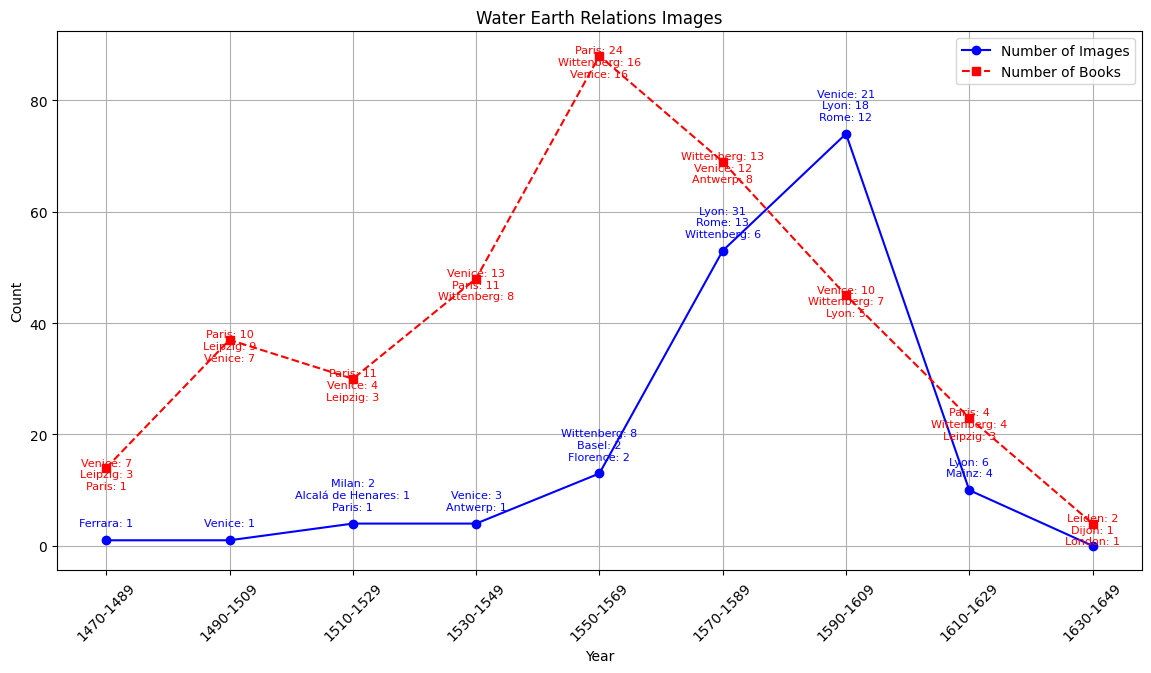

In [18]:
# Ensure the 'year' column is of type int
water_earth_realtion['year'] = water_earth_realtion['year'].astype(int)
books['year'] = books['year'].astype(int)

# Create 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column for the 20-year intervals in both DataFrames
water_earth_realtion['interval'] = pd.cut(water_earth_realtion['year'], bins=bins, labels=labels, right=False)
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Group by interval and count unique images
unique_images = water_earth_realtion.groupby('interval')['images'].nunique()

# Group by interval and count the number of books
books_count = books.groupby('interval').size()

# Function to get the top three places with the most unique images for each interval
def get_top_places_per_interval(interval):
    interval_df = water_earth_realtion[water_earth_realtion['interval'] == interval]
    top_places = interval_df.groupby('place')['images'].nunique().nlargest(3)
    return top_places

# Function to get the most common places for each interval in the books DataFrame
def get_most_common_places_per_interval(interval):
    interval_df = books[books['interval'] == interval]
    most_common_places = interval_df['place'].value_counts().head(3)
    return most_common_places

# Plot the results
plt.figure(figsize=(14, 7))

# Plot unique images by interval
plt.plot(unique_images.index, unique_images.values, marker='o', linestyle='-', color='blue', label='Number of Images')

# Plot number of books by interval
plt.plot(books_count.index, books_count.values, marker='s', linestyle='--', color='red', label='Number of Books')

# Add annotations for the top three places for unique images
for interval in labels:
    if interval in unique_images.index:
        top_places = get_top_places_per_interval(interval)
        annotation_text = '\n'.join([f'{place}: {count}' for place, count in top_places.items()])
        
        # Get the y-value for annotation
        unique_image_count = unique_images.loc[interval]
                
        # Annotation for unique images line
        plt.annotate(annotation_text, (interval, unique_image_count), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=8, color='blue')

# Add annotations for the most common places for books
for interval in labels:
    if interval in books_count.index:
        common_places = get_most_common_places_per_interval(interval)
        annotation_text = '\n'.join([f'{place}: {count}' for place, count in common_places.items()])
        
        # Get the y-value for annotation
        book_count = books_count.loc[interval]
                
        # Annotation for books line
        plt.annotate(annotation_text, (interval, book_count), textcoords="offset points", xytext=(0, -15), ha='center', fontsize=8, color='red')

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Water Earth Relations Images')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

In [11]:
path_to_xlsx = 'G:\\My Drive\\DataFiles\\Full_Image_List_6.5.24\\all_elements_with_part_type.xlsx'
all_keywords = pd.read_excel(path_to_xlsx)

C:\Users\nogas\AppData\Local\Temp\ipykernel_3096\2068627354.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unique_images_keyword_1 = all_keywords[has_keyword_1].groupby('interval')['images'].nunique()
C:\Users\nogas\AppData\Local\Temp\ipykernel_3096\2068627354.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unique_images_both_keywords = all_keywords[has_both_keywords].groupby('interval')['images'].nunique()


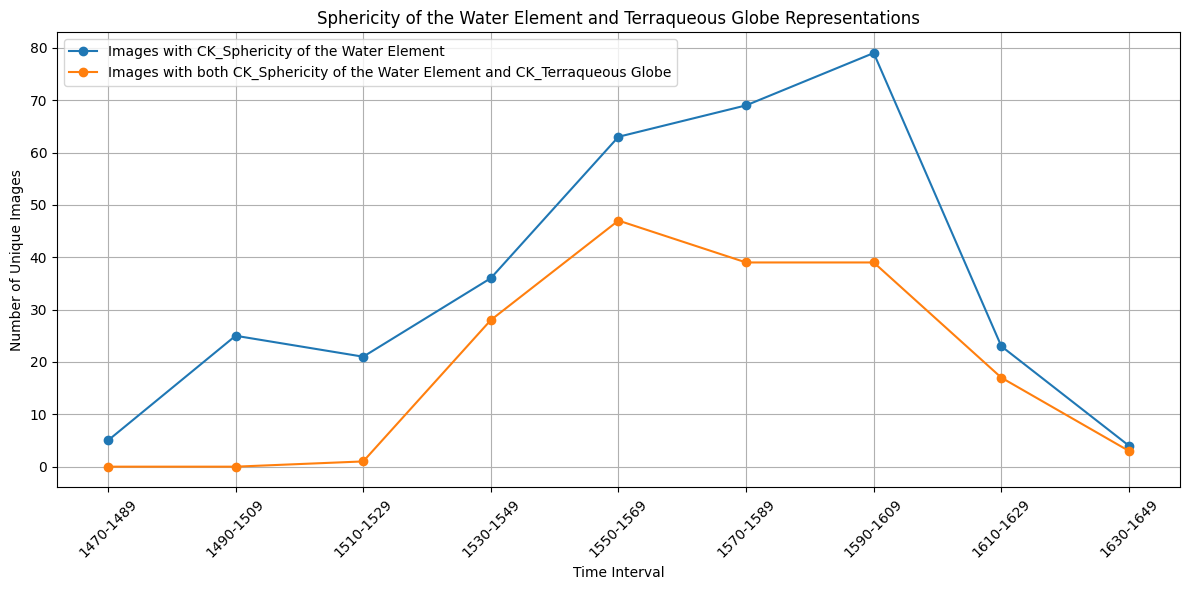

In [12]:
# Define the twenty-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Extract the year from 'year' column and bin it into intervals
all_keywords['interval'] = pd.cut(all_keywords['year'], bins=bins, labels=labels, right=False)

# Define the keywords to filter
keyword_1 = 'CK_Sphericity of the Water Element'
keyword_2 = 'CK_Terraqueous Globe'

# Create a boolean mask for the conditions
has_keyword_1 = all_keywords['keywords'].str.contains(keyword_1)
has_keyword_2 = all_keywords['keywords'].str.contains(keyword_2)
has_both_keywords = has_keyword_1 & has_keyword_2

# Calculate the number of unique images for each condition and interval
unique_images_keyword_1 = all_keywords[has_keyword_1].groupby('interval')['images'].nunique()
unique_images_both_keywords = all_keywords[has_both_keywords].groupby('interval')['images'].nunique()

# Plot the results
plt.figure(figsize=(12, 6))

plt.plot(unique_images_keyword_1.index, unique_images_keyword_1.values, label=f'Images with {keyword_1}', marker='o')
plt.plot(unique_images_both_keywords.index, unique_images_both_keywords.values, label=f'Images with both {keyword_1} and {keyword_2}', marker='o')

plt.xlabel('Time Interval')
plt.ylabel('Number of Unique Images')
plt.title('Sphericity of the Water Element and Terraqueous Globe Representations')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [18]:
path_to_xlsx = 'C:\\Users\\nogas\\Image_data\\sphericity_water_element_clusters.xlsx'
visual_data_water_sphericity = pd.read_excel (path_to_xlsx)
water_element_sphericity = pd.merge(water_element_sphericity, visual_data_water_sphericity, on='cluster_name')
water_element_sphericity

,images,cluster_name,cks,bid_x,part_id,year,place,bid_y,part_type,interval,...,full circle,semi circle,picture with no full circle,diagram,human figures,lines marking sight,disproportional element,material element,mistake,Column1
0,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_01435,CK_Sphericity of the Water Element,1632,100,1498,Leipzig,1594,100,1490-1509,...,no,no,yes,no,no,yes,no,yes,no,NaN
1,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_01435,CK_Sphericity of the Water Element,1632,100,1498,Leipzig,1597,100,1490-1509,...,no,no,yes,no,no,yes,no,yes,no,NaN
2,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_01435,CK_Sphericity of the Water Element,1632,100,1498,Leipzig,1609,100,1490-1509,...,no,no,yes,no,no,yes,no,yes,no,NaN
3,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_01435,CK_Sphericity of the Water Element,1632,100,1498,Leipzig,1611,100,1490-1509,...,no,no,yes,no,no,yes,no,yes,no,NaN
4,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_01435,CK_Sphericity of the Water Element,1632,100,1498,Leipzig,1612,100,1490-1509,...,no,no,yes,no,no,yes,no,yes,no,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16138,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_01140,"CK_Sphericity of the Water Element, CK_Terraqu...",2159,370,1583,Wittenberg,2161,influenced_100,1570-1589,...,yes,no,no,no,no,yes,yes,yes,no,NaN
16139,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_01140,"CK_Sphericity of the Water Element, CK_Terraqu...",2159,370,1583,Wittenberg,2162,influenced_100,1570-1589,...,yes,no,no,no,no,yes,yes,yes,no,NaN
16140,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_01140,"CK_Sphericity of the Water Element, CK_Terraqu...",2159,370,1583,Wittenberg,2163,influenced_100,1570-1589,...,yes,no,no,no,no,yes,yes,yes,no,NaN
16141,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_01140,"CK_Sphericity of the Water Element, CK_Terraqu...",2159,370,1583,Wittenberg,2164,influenced_100,1570-1589,...,yes,no,no,no,no,yes,yes,yes,no,NaN


C:\Users\nogas\AppData\Local\Temp\ipykernel_3096\3662852701.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return filtered_df.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)
C:\Users\nogas\AppData\Local\Temp\ipykernel_3096\3662852701.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return filtered_df.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)
C:\Users\nogas\AppData\Local\Temp\ipykernel_3096\3662852701.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to reta

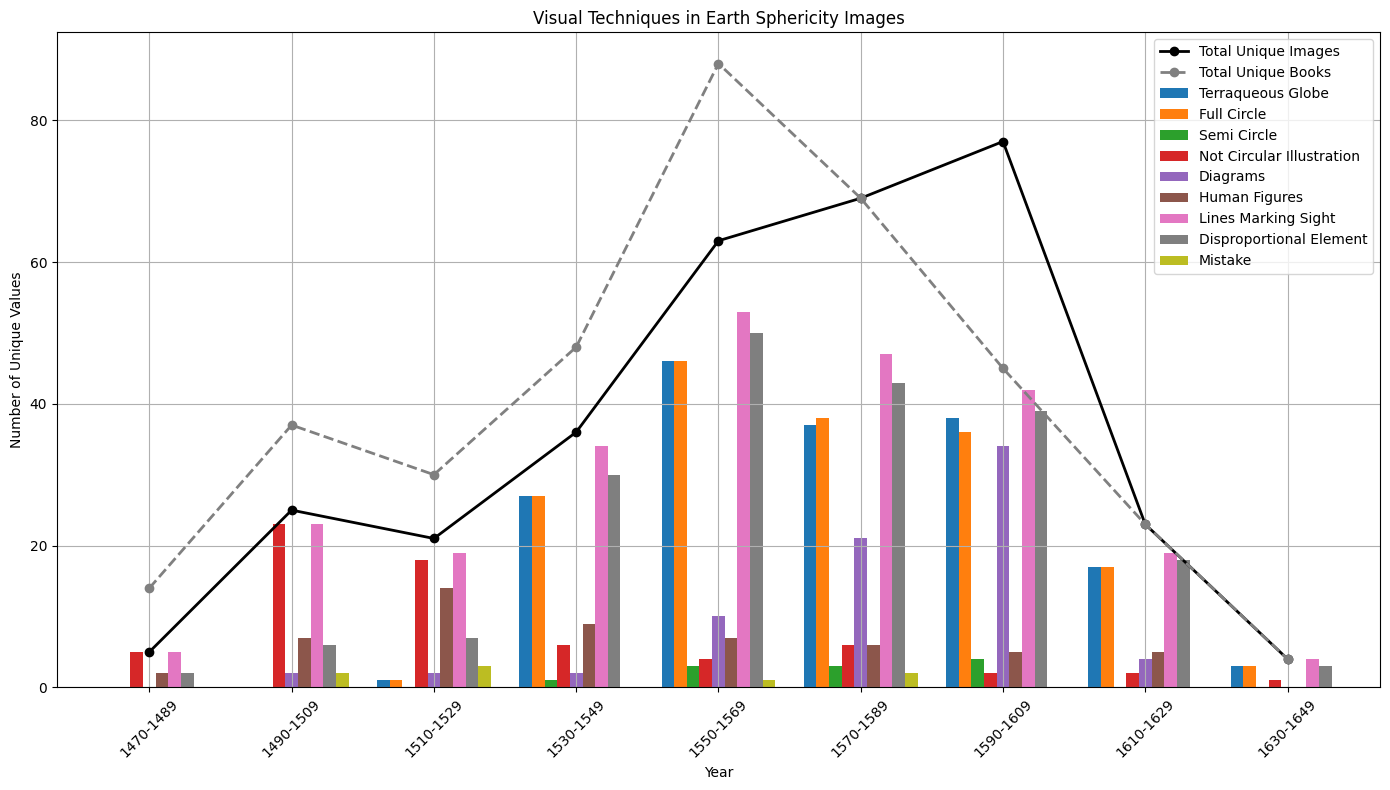

In [22]:
# Convert 'year' to int
water_element_sphericity['year'] = water_element_sphericity['year'].astype(int)

# Create 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column for the 20-year intervals
water_element_sphericity['interval'] = pd.cut(water_element_sphericity['year'], bins=bins, labels=labels, right=False)

# Function to count unique images by column
def count_unique_images_by_column(column_name, value):
    filtered_df = water_element_sphericity[water_element_sphericity[column_name] == value]
    return filtered_df.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)

# Collect data with corrected variable names
terraqueous_globe = count_unique_images_by_column('terraqueous globe', 'yes')
full_circle = count_unique_images_by_column('full circle', 'yes')
semi_circle = count_unique_images_by_column('semi circle', 'yes')
not_circular_illustration = count_unique_images_by_column('picture with no full circle', 'yes')
diagrams = count_unique_images_by_column('diagram', 'yes')
human_figures = count_unique_images_by_column('human figures', 'yes')
lines_marking_sight = count_unique_images_by_column('lines marking sight', 'yes')
disproportional_element = count_unique_images_by_column('disproportional element', 'yes')
mistake = count_unique_images_by_column('mistake', 'yes')

# Combine the data for side-by-side bars
side_by_side_data = pd.DataFrame({
    'Terraqueous Globe': terraqueous_globe,
    'Full Circle': full_circle,
    'Semi Circle': semi_circle,
    'Not Circular Illustration': not_circular_illustration,
    'Diagrams': diagrams,
    'Human Figures': human_figures,
    'Lines Marking Sight': lines_marking_sight,
    'Disproportional Element': disproportional_element,
    'Mistake': mistake
})

# Ensure 'books' DataFrame is defined and has the correct columns
# Assume 'books' DataFrame is structured similarly
total_unique_books_df = books.groupby('interval')['book'].nunique().reindex(labels, fill_value=0)

# Calculate total number of unique images for each interval
total_unique_images = water_element_sphericity.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)

# Plot side-by-side bar chart
fig, ax = plt.subplots(figsize=(14, 8))

# Plot the bar chart
side_by_side_data.plot(kind='bar', ax=ax, width=0.8)

# Plot the lines for total unique images and total unique books
ax.plot(labels, total_unique_images, marker='o', linestyle='-', color='black', label='Total Unique Images', linewidth=2)
ax.plot(labels, total_unique_books_df, marker='o', linestyle='--', color='gray', label='Total Unique Books', linewidth=2)

# Formatting the plot
plt.xlabel('Year')
plt.ylabel('Number of Unique Values')
plt.title('Visual Techniques in Earth Sphericity Images')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\nogas\AppData\Local\Temp\ipykernel_3096\2983786812.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return filtered_df.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)
C:\Users\nogas\AppData\Local\Temp\ipykernel_3096\2983786812.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return filtered_df.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)
C:\Users\nogas\AppData\Local\Temp\ipykernel_3096\2983786812.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to reta

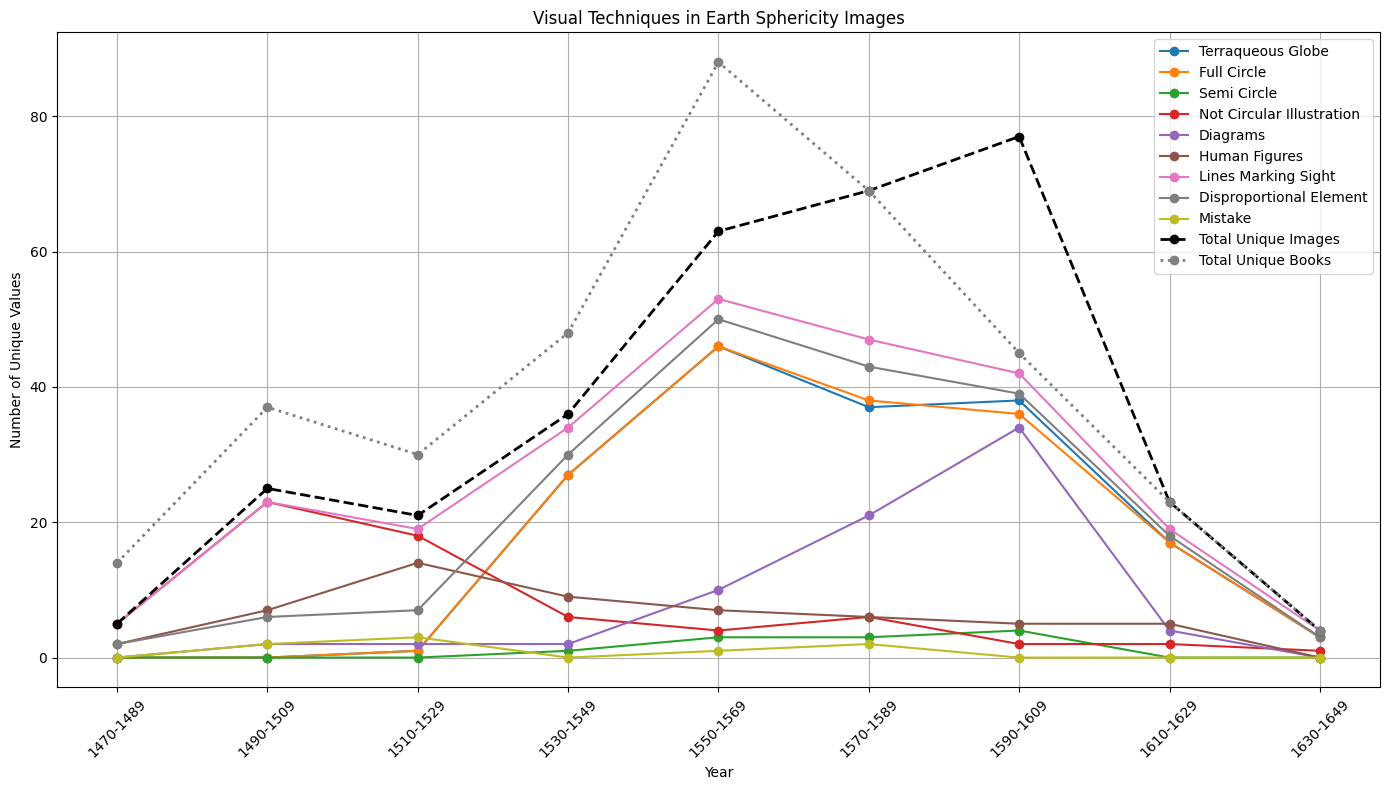

In [27]:
# Sample DataFrames (replace with your actual data)
# Ensure 'water_element_sphericity' and 'books' are defined and have the correct structure

# Convert 'year' to int
water_element_sphericity['year'] = water_element_sphericity['year'].astype(int)

# Create 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column for the 20-year intervals
water_element_sphericity['interval'] = pd.cut(water_element_sphericity['year'], bins=bins, labels=labels, right=False)

# Function to count unique images by column
def count_unique_images_by_column(column_name, value):
    filtered_df = water_element_sphericity[water_element_sphericity[column_name] == value]
    return filtered_df.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)

# Collect data with corrected variable names
terraqueous_globe = count_unique_images_by_column('terraqueous globe', 'yes')
full_circle = count_unique_images_by_column('full circle', 'yes')
semi_circle = count_unique_images_by_column('semi circle', 'yes')
not_circular_illustration = count_unique_images_by_column('picture with no full circle', 'yes')
diagrams = count_unique_images_by_column('diagram', 'yes')
human_figures = count_unique_images_by_column('human figures', 'yes')
lines_marking_sight = count_unique_images_by_column('lines marking sight', 'yes')
disproportional_element = count_unique_images_by_column('disproportional element', 'yes')
mistake = count_unique_images_by_column('mistake', 'yes')

# Combine the data for lines
side_by_side_data = pd.DataFrame({
    'Terraqueous Globe': terraqueous_globe,
    'Full Circle': full_circle,
    'Semi Circle': semi_circle,
    'Not Circular Illustration': not_circular_illustration,
    'Diagrams': diagrams,
    'Human Figures': human_figures,
    'Lines Marking Sight': lines_marking_sight,
    'Disproportional Element': disproportional_element,
    'Mistake': mistake
})

# Ensure 'books' DataFrame is defined and has the correct columns
# Assume 'books' DataFrame is structured similarly
total_unique_books_df = books.groupby('interval')['book'].nunique().reindex(labels, fill_value=0)

# Calculate total number of unique images for each interval
total_unique_images = water_element_sphericity.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)

# Plot lines
fig, ax = plt.subplots(figsize=(14, 8))

# Plot lines for each category
for column in side_by_side_data.columns:
    ax.plot(labels, side_by_side_data[column], marker='o', linestyle='-', label=column)

# Plot lines for total unique images and total unique books
ax.plot(labels, total_unique_images, marker='o', linestyle='--', color='black', label='Total Unique Images', linewidth=2)
ax.plot(labels, total_unique_books_df, marker='o', linestyle=':', color='gray', label='Total Unique Books', linewidth=2)

# Formatting the plot
plt.xlabel('Year')
plt.ylabel('Number of Unique Values')
plt.title('Visual Techniques in Earth Sphericity Images')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()